# Processing Raw Text

In [2]:
# need to be called from this point on in the book

import nltk, re, pprint
from nltk import word_tokenize

#### 3.1 Accessing Text from the Web and from Disk

*Getting from Project Gutenburg text number 2554, which is an English translation of __Crime and Punishment__:*

In [4]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)

# this line is different from the book
# we need to decode without byte order mark (BOM)
# so use this encoding instead

raw = response.read().decode('utf-8-sig') 
type(raw)

str

*Slightly different from the book's answer:*

In [6]:
len(raw)

1176811

In [7]:
raw[:75]

'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

*Tokenizing the text:*

In [9]:
tokens = word_tokenize(raw)  # Tokenize the raw text into individual words (tokens)
type(tokens)                 # Check the type of the 'tokens' object

list

In [10]:
len(tokens)

257058

In [11]:
print(tokens[:10], end = '')

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']

*Converting to an NLTK text:*

In [13]:
text = nltk.Text(tokens)
text

<Text: The Project Gutenberg eBook of Crime and Punishment...>

In [14]:
type(text)

nltk.text.Text

In [15]:
print(text[1024:1062], end = '')

['insight', 'impresses', 'us', 'as', 'wisdom', '...', 'that', 'wisdom', 'of', 'the', 'heart', 'which', 'we', 'seek', 'that', 'we', 'may', 'learn', 'from', 'it', 'how', 'to', 'live', '.', 'All', 'his', 'other', 'gifts', 'came', 'to', 'him', 'from', 'nature', ',', 'this', 'he', 'won', 'for']

In [16]:
text.collocations()  # Finds and prints collocations (frequent word pairs) in the text

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


*Getting rid of header and footer:*

In [18]:
raw.find("PART I")  # Search for the substring "PART I" in the raw text and return its starting index

5574

*This returns `-1`, which means the search failed:*

In [20]:
raw.rfind("End of Gutenberg's Crim")

-1

*The reason is because older Project Gutenberg texts often use curly single quotes `’`, which are not used in many modern systems.*

In [22]:
raw.rfind("End of Project Gutenberg’s Crime")

-1

In [23]:
raw = raw[5335:1157811]  # Extracts a portion of the raw text from index 5335 to 1157811
raw.find("PART I")       # Search for the substring "PART I" in this extracted portion of the text

239

In other words, "PART I" appears 239 characters from the start of the sliced portion of the text.

##### Dealing with HTML

In [26]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

*All the HTML content:*

In [28]:
#print(html)

*We can use __BeautifulSoup__ to get text out of HTML:*

In [30]:
from bs4 import BeautifulSoup

# Parse the HTML content and extract the raw text
raw = BeautifulSoup(html, 'html.parser').get_text()

# Tokenize the extracted text into individual words (tokens)
tokens = word_tokenize(raw)

# Print the tokens in a continuous format without newlines
print(tokens, end = '')

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'NEWS', 'SPORT', 'WEATHER', 'WORLD', 'SERVICE', 'A-Z', 'INDEX', 'SEARCH', 'You', 'are', 'in', ':', 'Health', 'News', 'Front', 'Page', 'Africa', 'Americas', 'Asia-Pacific', 'Europe', 'Middle', 'East', 'South', 'Asia', 'UK', 'Business', 'Entertainment', 'Science/Nature', 'Technology', 'Health', 'Medical', 'notes', '--', '--', '--', '--', '--', '--', '-', 'Talking', 'Point', '--', '--', '--', '--', '--', '--', '-', 'Country', 'Profiles', 'In', 'Depth', '--', '--', '--', '--', '--', '--', '-', 'Programmes', '--', '--', '--', '--', '--', '--', '-', 'SERVICES', 'Daily', 'E-mail', 'News', 'Ticker', 'Mobile/PDAs', '--', '--', '--', '--', '--', '--', '-', 'Text', 'Only', 'Feedback', 'Help', 'EDITIONS', 'Change', 'to', 'UK', 'Friday', ',', '27', 'September', ',', '2002', ',', '11:51', 'GMT', '12:51', 'UK', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'Scientists', 'believe', 'the', 'last', 'blond

In [31]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

# Parse the HTML content and extract the raw text
raw = BeautifulSoup(html, 'html.parser').get_text()

# Tokenize the extracted text into individual words (tokens)
tokens = word_tokenize(raw)

# Convert tokens to lowercase and remove duplicates using set
unique_tokens = sorted(set(token.lower() for token in tokens if token.isalpha()))

# Print the unique tokens
print(unique_tokens)

['a', 'about', 'africa', 'aid', 'alert', 'alien', 'also', 'americas', 'an', 'and', 'ann', 'apr', 'are', 'as', 'asia', 'at', 'attractive', 'babies', 'back', 'bbc', 'be', 'become', 'believe', 'beyond', 'big', 'blame', 'blonde', 'blondes', 'blood', 'bollywood', 'born', 'both', 'botox', 'bottle', 'business', 'but', 'by', 'campaign', 'can', 'cancer', 'carry', 'case', 'cause', 'caused', 'centuries', 'chance', 'change', 'child', 'choose', 'completely', 'confirmed', 'congo', 'content', 'country', 'daily', 'defect', 'demise', 'depth', 'dermatology', 'die', 'disadvantage', 'disappear', 'do', 'drop', 'drug', 'dumb', 'dye', 'dyed', 'east', 'ebola', 'edinburgh', 'editions', 'education', 'endangered', 'entertainment', 'europe', 'experts', 'explains', 'external', 'extinct', 'families', 'family', 'fears', 'feedback', 'few', 'finland', 'foot', 'for', 'frequency', 'friday', 'friend', 'front', 'gene', 'generation', 'genes', 'germany', 'gmt', 'grandparents', 'hair', 'have', 'having', 'he', 'health', 'hear

In [32]:
len(unique_tokens)

240

*Using trial and error to find the start/finish of the text.  Again, the indices given in the book are not correct.*

In [34]:
tokens = tokens[111:403]  # Select a subset of the tokens from index 111 to 403
text = nltk.Text(tokens)  # Convert the token list into an NLTK Text object for text processing
text.concordance('gene')  # Display the concordance (context) for the word 'gene'

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


##### Processing Search Engine Results

*__Your Turn__: Search the web for `"the of"` (inside quotes). Based on the large count, can we conclude that the of is a frequent collocation in English?*

*I got 165,000,000 results, which of course would be different than the number that the authors got while they were writing the book.*

*Despite the high number, it would be very wrong to assume "the of" is a common English collocation.  A large percentage of the hits were the result of transposition errors in the text: e.g. someone might type "the of point this..." when they meant to type "the point of this..."; another large contingent of results were phrases where 'the' and 'of' were separated by punctuation (e.g., "the # of"), which was presumably ignored by the search engine.  However, it has to be said that the vast majority of results did not feature "the of" in the summary, leading me to belief that Google does not always look at literal strings (i.e., strings inside quotes) when ranking results.*

##### Processing RSS Feeds

In [38]:
#! pip install feedparser

In [39]:
import feedparser

# Parse the Atom feed from the provided URL
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

# Access and print the title of the feed
llog['feed']['title']  # Retrieve the title of the feed from the parsed feed dictionary

'Language Log'

In [40]:
len(llog.entries)  # Get the number of entries (posts/articles) in the feed

13

In [41]:
post = llog.entries[2]  # Access the third post (entry) from the list of feed entries
post.title              # Retrieve and print the title of the third post

'&quot;The Truth About English Grammar&quot;'

In [42]:
content = post.content[0].value  # Access the content of the third post's first content section
content[:90]                     # Display the first 90 characters of the content

'<p>It\'s past time for me to feature Geoff Pullum\'s new book, <a href="https://www.amazon.c'

In [43]:
raw = BeautifulSoup(content, 'html.parser').get_text()  # Parse the HTML content and extract the raw text
print(word_tokenize(raw)[:50], end='')                  # Tokenize the text and print the first 50 tokens

['It', "'s", 'past', 'time', 'for', 'me', 'to', 'feature', 'Geoff', 'Pullum', "'s", 'new', 'book', ',', 'The', 'Truth', 'About', 'English', 'Grammar', '.', 'The', 'publisher', "'s", 'blurb', ':', 'Do', 'you', 'worry', 'that', 'your', 'understanding', 'of', 'English', 'grammar', 'isn', '’', 't', 'what', 'it', 'should', 'be', '?', 'It', 'may', 'not', 'be', 'your', 'fault', '.', 'For']

##### Reading Local Files

*__Your Turn:__ Create a file called `document.txt` using a text editor, and type in a few lines of text, and save it as plain text. If you are using IDLE, select the __New Window__ command in the File menu, typing the required text into this window, and then saving the file as `document.txt` inside the directory that IDLE offers in the pop-up dialogue box. Next, in the Python interpreter, open the file using `f = open('document.txt')`, then inspect its contents using `print(f.read())`.*

In [46]:
f = open('data/New Text Document.txt')
print(f.read())

In Japan, eggplants reach their peak of flavor during a period of time known as zansho (literally "lingering heat"), the equivalent of mid-August through late September. Such aki nasu, or autumn eggplants, are especially tasty. And, because eggplant is thought to cool the body (probably due to an unusually high concentration of minerals and phytonutrients in late-harvest fruit), dishes made with them are particularly inviting on days when heat and humidity sap the appetite.

Most varieties of Japanese eggplants boast tender, deeply purple skins and juicy, pale yellow-green flesh. They are all nearly seedless, and some varieties, such as Kamo nasu grown around Kyoto, are bulbous and squat. Others, such as Hakata nasu grown in Kyushu, are long and slender. All true Japanese varieties have a dark calyx, not a green one. Most people think of eggplant and other members of the nightshade family such as tomatoes as vegetables because of their savory taste â€” botanically, however, they are fr

##### Extracting Text from PDF, MSWord and other Binary Formats

*__No notes__*

##### Capturing User Input



In [48]:
#s = input("Enter some text: ")

In [49]:
#print("You typed", len(word_tokenize(s)), "words.")

*It seems the `?` was tokenized and counted as a word.*

##### The NLP Pipeline

#### 3.2 Strings: Text Processing at the Lowest Level

##### Basic Operations with Strings

*Use `\` or `( )` to extend a string over several lines:*

In [53]:
couplet =   "When I was a little bitty boy" \
            "My grandmother bought me a cute little toy" 
print(couplet)

When I was a little bitty boyMy grandmother bought me a cute little toy


In [54]:
couplet =   ("Silver bells hanging on a string" 
            "She told me it was my ding-a-ling-a-ling")

print(couplet)

Silver bells hanging on a stringShe told me it was my ding-a-ling-a-ling


*To get a newline between the lines we should use a triple-quoted string:*

In [56]:
couplet = """You know, then mama took me to Sunday school
They tried to teach me the golden rule"""

print(couplet)

You know, then mama took me to Sunday school
They tried to teach me the golden rule


<i>__Your Turn__: Try running the following code, then try to use your understanding of the string `+` and `*` operations to figure out how it works. Be careful to distinguish between the string `' '`, which is a single whitespace character, and `''`, which is the empty string.</i>

In [58]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]

for line in b:
     print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


##### Printing Strings

*__No notes.__*

##### Accessing Individual Characters

*Frequency Distribution of individual characters in a text:*

In [60]:
from nltk.corpus import gutenberg 

raw = gutenberg.raw('melville-moby_dick.txt')                    # Load the raw text of 'Moby Dick' from the Gutenberg corpus
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())  # Create a frequency distribution of the lowercase alphabetic characters
fdist.most_common(10)                                             # Display the 5 most common characters

[('e', 117092),
 ('t', 87996),
 ('a', 77916),
 ('o', 69326),
 ('n', 65617),
 ('i', 65434),
 ('s', 64231),
 ('h', 62896),
 ('r', 52134),
 ('l', 42793)]

Typical frequency of letters in the English language:

    E - 12.7%
    T - 9.1%
    A - 8.2%
    O - 7.5%
    I - 7.0%
    N - 6.7%
    S - 6.3%
    H - 6.1%
    R - 6.0%
    D - 4.3%

In [62]:
print([char for (char, count) in fdist.most_common()], end = '')  # Print all characters from the frequency distribution, sorted by their frequency

['e', 't', 'a', 'o', 'n', 'i', 's', 'h', 'r', 'l', 'd', 'u', 'm', 'c', 'w', 'f', 'g', 'p', 'b', 'y', 'v', 'k', 'q', 'j', 'x', 'z']

*As a plot:*

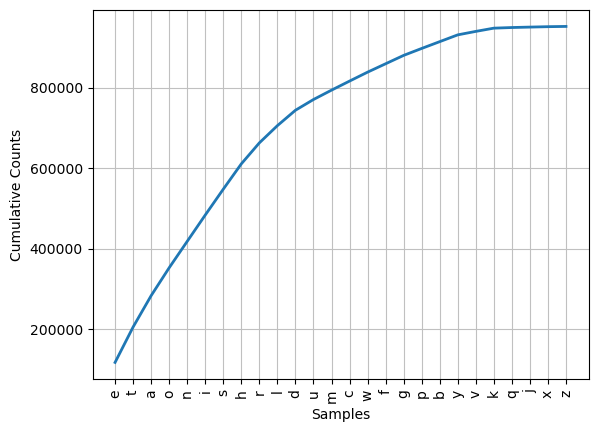

In [64]:
%matplotlib inline
fdist.plot(cumulative = True);

##### Accessing Substrings

*__Your Turn__: Make up a sentence and assign it to a variable, e.g. `sent = 'my sentence...'`. Now write slice expressions to pull out individual words. (This is obviously not a convenient way to process the words of a text!)*

In [66]:
sent = "I am learning how to code in Python"  # Assign a sentence to the variable

words = sent.split()  # Split the sentence into words based on spaces

# Print each word in the sentence
for word in words:
    print(word)

I
am
learning
how
to
code
in
Python


##### More operations on strings

|       Method      |                            Functionality                            |
|:------------------|:--------------------------------------------------------------------|
| `s.find(t)`       | index of first instance of   string `t` inside `s` (`-1` if not found)    |
| `s.rfind(t)`      | index of last instance of   string `t` inside `s` (`-1` if not found)     |
| `s.index(t)`      | like `s.find(t)` except it raises `ValueError` if not   found           |
| `s.rindex(t)`     | like `s.rfind(t)` except it raises `ValueError` if not   found          |
| `s.join(text)`    | combine the words of the text into a string using `s` as the glue     |
| `s.split(t)`      | split `s` into a list wherever a `t` is found (whitespace   by default) |
| `s.splitlines()`  | split `s` into a list of strings, one per line                        |
| `s.lower()`       | a lowercased version of the string `s`                                |
| `s.upper()`       | an uppercased version of the string `s`                               |
| `s.title()`       | a titlecased version of the string `s`                                |
| `s.strip()`       | a copy of `s` without leading or trailing whitespace                  |
| `s.replace(t, u)` | replace instances of `t` with `u` inside `s`                              |


##### The Difference between Lists and Strings

*__No Notes.__*

#### 3.3 Text Processing with Unicode



##### Extracting encoded text from files

In [71]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [72]:
with open(path, encoding='latin2') as f: # Open the file using the found path with 'latin2' encoding
    
    for line in f:   # Iterate through each line and print it without cleaning or stripping
        print(line)  # This will print the line with all its original formatting

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą

"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez

Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały

odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki

Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych

archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.



In [73]:
f = open(path, encoding='latin2')  # Open the file at the given path with 'latin2' encoding

for line in f:           # Iterate over each line in the file
    line = line.strip()  # Remove any leading/trailing whitespace characters, including newlines
    print(line)          # Print the cleaned line

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


*Converting all non-ASCII characters into two-digit \xXX and four-digit \uXXXX representations:*

In [75]:
f = open(path, encoding='latin2')  # Open the file with 'latin2' encoding

for line in f:                            # Iterate through each line in the file
    line = line.strip()                   # Remove leading and trailing whitespace
    print(line.encode('unicode_escape'))  # Print the line, encoding it to 'unicode_escape'

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


*Getting the integer ordinal of a character:*

In [77]:
ord('ń')

324

*Converting hexadecimal to 4 digit notation:*

In [79]:
hex(324)

'0x144'

*Print 4 digit notation:*

In [81]:
nacute = '\u0144'
nacute

'ń'

*To see the representation of bytes:*

In [83]:
nacute.encode('utf8')

b'\xc5\x84'

The module unicodedata lets us inspect the properties of Unicode characters. In the
following example, we select all characters in the third line of our Polish text outside
the ASCII range and print their UTF-8 escaped value, followed by their code point
integer using the standard Unicode convention (i.e., prefixing the hex digits with U+),
followed by their Unicode name.

In [85]:
# Again, just as reference.

f = open(path, encoding='latin2')  # Open the file at the given path with 'latin2' encoding

for line in f:           # Iterate over each line in the file
    line = line.strip()  # Remove any leading/trailing whitespace characters, including newlines
    print(line)          # Print the cleaned line

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [86]:
import unicodedata

# Open the file at the given path using 'latin2' encoding and read all lines
lines = open(path, encoding='latin2').readlines()

# Access the third line (index 2) from the file
line = lines[2]

# Print the line encoded as 'unicode_escape' to display Unicode escape sequences
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [87]:
line = lines[2]
line

'Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały\n'

In [88]:
for c in line:        # Loop through each character in the line
    if ord(c) > 127:  # Check if the character is non-ASCII (ord value > 127)
        
        # Print the character encoded in UTF-8, its Unicode code point, and its official Unicode name
        print("{} U+{:04x} {}".format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


*With UTF-8:*

In [90]:
line

'Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały\n'

In [91]:
for c in line:  # Loop through each character in the line
    if ord(c) > 127:  # Check if the character's Unicode code point is greater than 127 (non-ASCII)
        
        # Print the character, its Unicode code point (in hex), and its official Unicode name
        print("{} U+{:04x} {}".format(c, ord(c), unicodedata.name(c)))

ó U+00f3 LATIN SMALL LETTER O WITH ACUTE
ś U+015b LATIN SMALL LETTER S WITH ACUTE
Ś U+015a LATIN CAPITAL LETTER S WITH ACUTE
ą U+0105 LATIN SMALL LETTER A WITH OGONEK
ł U+0142 LATIN SMALL LETTER L WITH STROKE


*Using `re` with Unicode characters:*

In [93]:
line

'Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały\n'

In [94]:
line.find('zosta\u0142y')  # Find the position of the substring 'zostały' in the line

54

In [95]:
line = line.lower()
line

'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [96]:
line.encode('unicode_escape')  # Encode the string into 'unicode_escape' format

b'niemc\\xf3w pod koniec ii wojny \\u015bwiatowej na dolny \\u015bl\\u0105sk, zosta\\u0142y\\n'

In [97]:
m = re.search('\u015b\w*', line)  # Search for a word starting with the letter 'ś' (represented as \u015b in Unicode)
m.group()                         # Return the matched word

'światowej'

*NLTK tokenizers also work with Unicode strings:*

In [99]:
line

'niemców pod koniec ii wojny światowej na dolny śląsk, zostały\n'

In [100]:
print(word_tokenize(line), end = '')  # Tokenize the string 'line' into words and print the result without a newline at the end

['niemców', 'pod', 'koniec', 'ii', 'wojny', 'światowej', 'na', 'dolny', 'śląsk', ',', 'zostały']

##### Using your local encoding in Python

*__No notes.__*

#### 3.4   Regular Expressions for Detecting Word Patterns

*We'll use the Words Corpus, but we need to remove proper names:*

In [103]:
# List comprehension to create a list of words in the 'en' (English) corpus, converted to lowercase
wordlist = [w for w in nltk.corpus.words.words('en') if w.lower()]  

##### Using Basic Meta-Characters

*Using RegEx to find the first fify words ending with __ed__:*

In [105]:
# Find words in 'wordlist' that end with 'ed' and print the first 50
print([w for w in wordlist if re.search('ed$', w)][:50], end = '')  

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted', 'accredited', 'accursed', 'accused', 'accustomed', 'acetated', 'acheweed', 'aciculated', 'aciliated', 'acknowledged', 'acorned', 'acquainted', 'acquired', 'acquisited', 'acred', 'aculeated', 'addebted', 'added', 'addicted', 'addlebrained', 'addleheaded', 'addlepated', 'addorsed', 'adempted', 'adfected', 'adjoined', 'admired', 'admitted', 'adnexed', 'adopted', 'adossed']

*Using `.` as a __wildcard__ to find 8-letter words whose respective third and sixth letters are __j__ and __t__:* 

In [107]:
# Find words that match the pattern '^..j..t..$' and print them
print([w for w in wordlist if re.search('^..j..t..$', w)])  

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


#### Explanation:
^..j..t..$: This regular expression matches words with the following pattern:

    ^: The start of the string.
    ..: Any two characters (two dots).
    j: The letter 'j' as the third character.
    ..: Any two characters after the 'j'.
    t: The letter 't' as the sixth character.
    ..: Any two characters following the 't'.
    $: The end of the string.

In [109]:
print([w for w in wordlist if re.search('leo', w)])  # Find words that contain the string 'leo' and print them 

['aculeolate', 'aculeolus', 'Aleochara', 'anthropoteleoclogy', 'anthropoteleological', 'ateleological', 'Betsileos', 'binucleolate', 'bipaleolate', 'bleo', 'bradyteleocinesia', 'bradyteleokinesis', 'caryophylleous', 'celeomorph', 'Celeomorphae', 'celeomorphic', 'ceruleolactite', 'ceruleous', 'Chamaeleo', 'Chamaeleon', 'Chamaeleontidae', 'chameleon', 'chameleonic', 'chameleonize', 'chameleonlike', 'cholecystoileostomy', 'choleokinase', 'choraleon', 'cleoid', 'Cleome', 'Cleopatra', 'cochleous', 'coeruleolactite', 'Coleochaetaceae', 'coleochaetaceous', 'Coleochaete', 'Coleophora', 'Coleophoridae', 'coleopter', 'Coleoptera', 'coleopteral', 'coleopteran', 'coleopterist', 'coleopteroid', 'coleopterological', 'coleopterology', 'coleopteron', 'coleopterous', 'coleoptile', 'coleoptilum', 'coleorhiza', 'Coleosporiaceae', 'Coleosporium', 'dysteleological', 'dysteleologist', 'dysteleology', 'eccaleobion', 'eleoblast', 'Eleocharis', 'eleolite', 'eleomargaric', 'eleometer', 'eleonorite', 'eleoptene'

*__Your Turn:__ The caret symbol `^` matches the start of a string, just like the `$` matches the end. What results do we get with the above example if we leave out both of these, and search for `«..j..t..»`?

In [111]:
print([w for w in wordlist if re.search('..j..t..', w)][:50])

['abjectedness', 'abjection', 'abjective', 'abjectly', 'abjectness', 'adjection', 'adjectional', 'adjectival', 'adjectivally', 'adjective', 'adjectively', 'adjectivism', 'adjectivitis', 'adjustable', 'adjustably', 'adjustage', 'adjustation', 'adjuster', 'adjustive', 'adjustment', 'antejentacular', 'antiprojectivity', 'bijouterie', 'coadjustment', 'cojusticiar', 'conjective', 'conjecturable', 'conjecturably', 'conjectural', 'conjecturalist', 'conjecturality', 'conjecturally', 'conjecture', 'conjecturer', 'coprojector', 'counterobjection', 'dejected', 'dejectedly', 'dejectedness', 'dejectile', 'dejection', 'dejectly', 'dejectory', 'dejecture', 'disjection', 'guanajuatite', 'inadjustability', 'inadjustable', 'injectable', 'injection']


*The result will be all words of at least eight letters with at least two letters before a __j__, two additional letters, a __t__, and at least two more letters.*

*The `?` means the preceding character is optional.  The following code will find all the words with __judg__ or __judge__ in the wordlist:*

In [113]:
print([w for w in wordlist if re.search('judge?', w)])

['abjudge', 'adjudge', 'adjudgeable', 'adjudger', 'adjudgment', 'cojudge', 'counterjudging', 'forejudge', 'forejudgment', 'forjudge', 'forjudger', 'interjudgment', 'judge', 'judgeable', 'judgelike', 'judger', 'judgeship', 'judgingly', 'judgmatic', 'judgmatical', 'judgmatically', 'judgment', 'misjudge', 'misjudgement', 'misjudger', 'misjudgingly', 'misjudgment', 'overjudge', 'overjudging', 'overjudgment', 'prejudge', 'prejudgement', 'prejudger', 'prejudgment', 'rejudge', 'stockjudging', 'subjudge', 'unadjudged', 'underjudge', 'unjudgable', 'unjudge', 'unjudged', 'unjudgelike', 'unjudging', 'unprejudged']


##### Ranges and Closures

*The T9 system of entering text on older mobile phones:*

*Finding words that could have been written with the sequence 4653:*

In [116]:
# Find words that match the pattern '^[ghi][mno][jkl][def]$'
print([w for w in wordlist if re.search('^[ghi][mno][jkl][def]$', w)])  

['gold', 'golf', 'hold', 'hole']


In [117]:
print([w for w in wordlist if re.search('^[jkl][def][mno]$', w)])  

['ken']


In [118]:
print([w for w in wordlist if re.search('^[pqrs][ghi][jkl]$', w)])  

['pik', 'sil']


In [119]:
print([w for w in wordlist if re.search('^[mno][tuv][ghi]$', w)])  

['mug', 'nth']


In [120]:
print([w for w in wordlist if re.search('^[mno][mno][mno][jkl][def][wxyz]$', w)])  

['monkey']


In [121]:
print([w for w in wordlist if re.search('^[pqrs][abc][ghi][mno][abc][mno][wxyz]$', w)])  

['rainbow']


*Examples of __Kleene closures__:*

In [123]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))  # Get a sorted set of unique words from the NPS chat corpus

# Find words in 'chat_words' that match the pattern '^m+i+n+e+$' 
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [124]:
print([w for w in chat_words if re.search('^[ha]+$', w)])

['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'h', 'ha', 'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha', 'hahahaa', 'hahahah', 'hahahaha', 'hahahahaaa', 'hahahahahaha', 'hahahahahahaha', 'hahahahahahahahahahahahahahahaha', 'hahahhahah', 'hahhahahaha']


*A `^` inside square brackets means to exclude everything with these characters.  `<<^[^aeiouAEIOU]+$>>` would match everything without a vowel:*

In [126]:
print([w for w in chat_words if re.search('^[^aeiouAEIOU]+$', w)])  # Print words that contain no vowels

['!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!', '!!!!!!!', '!!!!!!!!', '!!!!!!!!!', '!!!!!!!!!!', '!!!!!!!!!!!', '!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!', '!!!!!!.', '!!!!!.', '!!!!....', '!!!.', '!!.', '!!...', '!.', '!...', '!=', '!?', '!??', '!???', '"', '"...', '"?', '"s', '#', '###', '####', '$', '$$', '$27', '&', '&^', "'", "''", "'.", "'d", "'ll", "'m", "'n'", "'s", '(', '(((', '((((', '(((((', '((((((', '(((((((', '((((((((', '(((((((((', '((((((((((', '(((((((((((', '((((((((((((', '(((((((((((((', '((((((((((((((', '(((((((((((((((', '(((((((((((((((((', '((((((((((((((((((', '((((((((((((((((((((', '(((((((((((((((((((((', '(((((((((((((((((((((((', '((((((((((((((((((((((((', '(((((((((((((((((((((((((', '((((((((((((((((((((((((((', '(((((..', '(*&(^', '(.', ')', ')))', '))))', ')))))', ')))))))', '))))))))',

In [127]:
wsj = sorted(set(nltk.corpus.treebank.words()))  # Get a sorted set of unique words from the WSJ (Wall Street Journal) corpus

# Find words that match the pattern of decimal numbers and print the first 50
print([w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][:50])  

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5', '0.50', '0.54', '0.56', '0.60', '0.7', '0.82', '0.84', '0.9', '0.95', '0.99', '1.01', '1.1', '1.125', '1.14', '1.1650', '1.17', '1.18', '1.19', '1.2', '1.20', '1.24', '1.25', '1.26', '1.28', '1.35', '1.39', '1.4', '1.457', '1.46', '1.49', '1.5', '1.50', '1.55', '1.56', '1.5755', '1.5805', '1.6', '1.61', '1.637', '1.64']


In [128]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]  # Find words that are uppercase and end with a dollar sign ($)

['C$', 'US$']

*`\` is used as an escape character.  Normally, `.` is a wildcard character and `$` is used to designate the end of a string.  Here we'd like to search for strings composed of numbers with a decimal and for alphabetic strings with a dollar sign, so we need to escape the characters.*

In [130]:
print([w for w in wsj if re.search('^[0-9]{4}$', w)])  # Find and print words that consist of exactly four digits

['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933', '1934', '1948', '1953', '1955', '1956', '1961', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1975', '1976', '1977', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2005', '2009', '2017', '2019', '2029', '3057', '8300']


In [131]:
print([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)])  # Find and print words that match a specific pattern

['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year', '14-hour', '15-day', '150-point', '190-point', '20-point', '20-stock', '21-month', '237-seat', '240-page', '27-year', '30-day', '30-point', '30-share', '30-year', '300-day', '36-day', '36-store', '42-year', '50-state', '500-stock', '52-week', '69-point', '84-month', '87-store', '90-day']


#### Explanation:

`^[0-9]+`: This matches one or more digits at the beginning of the word.

`-`: Matches a literal hyphen (-).

`[a-z]{3,5}`: Matches between 3 and 5 lowercase letters.

`$`: Matches the end of the string.

In [133]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]  # Find words that match the given pattern in the WSJ corpus

#  ^[a-z]{5,}: Matches a word that starts with at least 5 lowercase letters.
# -[a-z]{2,3}: The word must then have a hyphen followed by 2 or 3 lowercase letters.
#  -[a-z]{,6}: After another hyphen, the word must end with up to 6 lowercase letters (can be 0 to 6 characters).
#           $: The end of the string.

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

*`{ }` are used to restrict the size of the returned hits. `{n}` means only those strings of length $n$.  `{n,}` means those strings at least as long as $n$.  `{,n}` means those strings no longer than $n$.*

*The `|` means to match either of these strings.  When used with parentheses, it can be combined with other operators.  E.g., in the example above `'(ed|ing)$'` returns strings that end with either `ed` or `ing`.  But without the parenthesis, the `$` operator is attached only to `ing`, so the code below will find strings that have `ed` anywhere within their string, or `ing` at their end.*

In [136]:
# Find words that end with 'ed' or 'ing' and print the first 50
print([w for w in wsj if re.search('(ed|ing)$', w)][:50])  

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Boeing', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Change-ringing', 'Citing', 'Concerned', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged', 'Encouraging', 'English-speaking', 'Estimated', 'Everything', 'Excluding', 'Exxon-owned']


In [137]:
# Find words that contain 'ed' or end with 'ing' and print the first 50
print([w for w in wsj if re.search('ed|ing$', w)][:50])  

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything', 'Arbitrage-related', 'Arbitraging', 'Asked', 'Assuming', 'Atlanta-based', 'Baking', 'Banking', 'Beginning', 'Beijing', 'Being', 'Bermuda-based', 'Betting', 'Biedermann', 'Boeing', 'Breeden', 'Broadcasting', 'Bucking', 'Buying', 'Calif.-based', 'Cathedral', 'Cedric', 'Change-ringing', 'Citing', 'Concerned', 'Confederation', 'Confronted', 'Conn.based', 'Consolidated', 'Continued', 'Continuing', 'Credit', 'Declining', 'Defending', 'Depending', 'Designated', 'Determining', 'Developed', 'Died', 'During', 'Encouraged']


*__Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures__*

| Operator        | Behavior                                                 |
|:-----------|:--------------------------------------------------------------------------------|
| `.`        | Wildcard, matches any character                                                 |
| `^abc`     | Matches some pattern $abc$ at the start of a string                               |
| `abc$`     | Matches some pattern $abc$ at the end of a string                                 |
| `[abc]`    | Matches one of a set of characters                                              |
| `[A-Z0-9]` | Matches one of a range of characters                                            |
| `ed|ing|s` | Matches one of the specified strings (disjunction)                              |
| `*`        | Zero or more of previous item, e.g. `a*`, `[a-z]*` (also known   as $Kleene Closure$) |
| `+`        | One or more of previous item, e.g. `a+`, `[a-z]+`                                   |
| `?`        | Zero or one of the previous item (i.e. optional),   e.g. `a?`, `[a-z]?`             |
| `{n}`      | Exactly $n$ repeats where $n$ is a non-negative integer                             |
| `{n,}`     | At least $n$ repeats                                                              |
| `{,n}`     | No more than $n$ repeats                                                          |
| `{m,n}`    | At least $m$ and no more than $n$ repeats                                           |
| `a(b|c)+`  | Parentheses that indicate the scope of the operators                            |
|            |                                                                                 |

#### 3.5   Useful Applications of Regular Expressions

*Using `re.findall()` to find and count the vowels in a word:*

In [141]:
word = 'supercalifragilisticexpialidocious'  # Define the word
print(re.findall(r'[aeiou]', word))          # Find and print all vowels in the word

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [142]:
len(re.findall(r'[aeiou]', word))  # Count the number of vowels in the word

16

*If we only want the number of hits, we can also use this:*

In [144]:
sum([1 for r in re.findall(r'[aeiou]', word)])  # Count the number of vowels by summing 1 for each vowel found

16

*Sequences of two or more vowels and their relative frequencies:*

In [146]:
wsj = sorted(set(nltk.corpus.treebank.words()))  # Get a sorted set of unique words from the WSJ corpus

# Create a frequency distribution of vowel sequences that appear two or more times in each word
fd = nltk.FreqDist(vs for word in wsj
                   for vs in re.findall(r'[aeiou]{2,}', word))  # Find vowel sequences of two or more vowels

# Print the 12 most common vowel sequences found
print(fd.most_common(12))  

[('io', 549), ('ea', 476), ('ie', 331), ('ou', 329), ('ai', 261), ('ia', 253), ('ee', 217), ('oo', 174), ('ua', 109), ('au', 106), ('ue', 105), ('ui', 95)]


*__Your Turn:__ In the W3C Date Time Format, dates are represented like this: 2009-12-31. Replace the `?` in the following Python code with a regular expression, in order to convert the string `'2009-12-31'` to a list of integers `[2009, 12, 31]`:

`[int(n) for n in re.findall(?, '2009-12-31')]`

In [148]:
# Extract sequences of two or more digits and convert them to integers
[int(n) for n in re.findall(r'[0-9]{2,}', '2009-12-31')]  

[2009, 12, 31]

##### Doing More with Word Pieces

*Removing internal vowels from a text:*

In [150]:
# Original Text:

english_udhr = nltk.corpus.udhr.words('English-Latin1')  # Load the UDHR corpus in English

text = ' '.join(english_udhr[:75])          # Join the first 75 words into a single string
print(text)

Universal Declaration of Human Rights Preamble Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom , justice and peace in the world , Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind , and the advent of a world in which human beings shall enjoy freedom of speech and


In [151]:
regexp = r'^[AEIOUaeiou]+|[^AEIOUaeiou]|[AEIOUaeiou]+$'  # Retaining any initial or final vowel sequences, throw away the others

def compres(word):
    pieces = re.findall(regexp, word)   # Find all matches in the word based on the regex
    return ''.join(pieces)              # Join the matches into a compressed string

english_udhr = nltk.corpus.udhr.words('English-Latin1')  # Load the UDHR corpus in English

# Compress each word in the first 75 words of the corpus and print them in a wrapped format
print(nltk.tokenwrap(compres(w) for w in english_udhr[:75]))  

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


Next, let’s combine regular expressions with conditional frequency distributions. Here
we will extract all consonant-vowel sequences from the words of Rotokas, such as ka
and si. Since each of these is a pair, it can be used to initialize a conditional frequency
distribution. We then tabulate the frequency of each pair:

*Finding frequencies of consonant-vowel sequences from the words of Rotokas:*

In [154]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')  # Load the Rotokas dictionary from the NLTK toolbox corpus

# Extract consonant-vowel (CV) pairs from the words in the Rotokas dictionary
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]

# Create a Conditional Frequency Distribution of the consonant-vowel pairs
cfd = nltk.ConditionalFreqDist(cvs)

# Tabulate the frequencies of the consonant-vowel pairs
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


This program processes each word w in turn, and for each one, finds every substring
that matches the regular expression «[ptksvr][aeiou]»

*Making an index of all possible consonant-vowel pairs in the language:*

In [157]:
# Extract consonant-vowel (CV) pairs from each word in the Rotokas dictionary and store them with their corresponding words
cv_word_pairs = [(cv, w) for w in rotokas_words
                         for cv in re.findall(r'[ptksvr][aeiou]', w)]

# Create an index mapping each CV pair to the words that contain them
cv_index = nltk.Index(cv_word_pairs)

# Retrieve and print the words that contain the consonant-vowel pair 'su'
cv_index['su']

['kasuari']

In [158]:
print(cv_index['po'])  # all words containing 'po'

['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


In [159]:
len(cv_index['po']) # number of words containing 'po'

34

In [160]:
print(cv_index['te'])  # all words containing 'te'

['kakate', 'kakupute', 'kerete', 'kerete', 'kokoote', 'kokote', 'koriteira', 'kukue pute']


In [161]:
len(cv_index['te']) # number of words containing 'te'

8

##### Finding Word Stems

*A simple approach:*

In [163]:
def stem(word):
    # Loop through the list of suffixes to remove them from the word if they are found
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        
        if word.endswith(suffix):       # Check if the word ends with the current suffix
            return word[:-len(suffix)]  # Remove the suffix by slicing the word up to its length
            
    return word                         # Return the original word if no suffix is found

*A step-by-step outline of how we could use RegExp:*

*Here's a disjunction of all the suffixes:*

In [165]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

*This just returns the suffix because the `( )` also selects which substring to return.  If we want the parentheses to specify the scope of the disjunction, but not select the material to be output, we have to add `?:`:*

In [167]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

*Since we want this split, we have to parenthesize both parts of the regular expression:*

In [169]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

*Let's try it with a different form of the word:*

In [171]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

*Star operators are by default greedy and will try to 'consume' as much of the input as possible.  We can turn this off with `*?`:*

In [173]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

*We can allow for empty strings by adding `?`:*

In [175]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

*Encasing this in a function:*

In [177]:
def stem(word):
    # Define a regular expression to capture the stem and optional suffix
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    
    # Use re.findall() to apply the regex and extract the stem and suffix from the word
    stem, suffix = re.findall(regexp, word)[0]
    
    # Return the stem of the word (without the suffix)
    return stem

In [178]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)  # Tokenize the raw text into individual words

# Apply the stem function (from your earlier code) to each token in the list
print([stem(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


##### Searching Tokenized Text

*`<a> <man>` will find all instances of __a man__ in a text.  The angle brackets are used to mark token boundaries, and white space is ignored (this only applies to NLTK `findall()` method for texts.  Here, we'll look for all occurrences of "a _ _ _ man" in "Moby Dick".  The parentheses within the search term limits the returned string, so only the word between "a" and "man" is returned:*

In [180]:
from nltk.corpus import gutenberg, nps_chat

moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))  # Load the text of 'Moby Dick' as an NLTK Text object

moby.findall(r"<a> (<.*>) <man>")  # Find all patterns in the form of "<a> (something) <man>"

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


*Now we'll look at the chat corpus and find three-word phrases ending with "bro":*

In [182]:
chat = nltk.Text(nps_chat.words())  # Load the words from the NPS Chat Corpus as an NLTK Text object

moby.findall(r"<.*><.*><bro>")      # Find all sequences where two words are followed by "bro"

In [183]:
chat.findall(r"<.*><.*><man>")      # Find all sequences where two words are followed by "man"

tomorrow ya man; Aw , man; my eye man; a bisexual man; ever sleep man;
bored ? man; of a man; OOH DAamn man; a real man; thats cold man; JOIN
oh man; U26 U26 man; the U26 man; of macho man; if a man; good lookin
man; with a man; U53 :-) man; JOIN ...... man; JOIN oh man; single /
man; on heat man; um um man; U69 smart man; the egg man; you a man;
Wtf , man; the comon man; the single man; mmmmmm U18 man; live there
man; lol oh man; marry a man


*This finds sequences of three or more words starting with __l__:*

In [185]:
chat.findall(r"<l.*>{3,}")  # Find all sequences where a word starting with 'l' appears three or more times in a row

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [186]:
moby.findall(r"<l.*>{3,}")  # Find all sequences where a word starting with 'l' appears three or more times in a row

little lower layer; little lower layer; lances lie levelled; long
lance lightly; like live legs


__Your Turn:__ Consolidate your understanding of regular expression patterns and substitutions using `nltk.re_show(p, s)` which annotates the string `s` to show every place where pattern `p` was matched, and `nltk.app.nemo()` which provides a graphical interface for exploring regular expressions. For more practice, try some of the exercises on regular expressions at the end of this chapter.

*For `nltk.re_show(p, s)`, `p` cannot be a regular expression (a fact which could have been made clearer...*

In [188]:
yogi = "When you come to a fork in the road, take it."  # Define the string containing the sentence by Yogi Berra

nltk.re_show(r"f.*k", yogi)  # The regex pattern matches any word starting with "f", followed by any characters, and ending with "k"

When you come to a {fork in the road, tak}e it.


In [189]:
nltk.re_show("fork", yogi)

When you come to a {fork} in the road, take it.


In [190]:
nltk.re_show("f.*k", yogi)

When you come to a {fork in the road, tak}e it.


*`nltk.app.nemo()` can be used in jupyter notebooks, but it opens an external window which will prevent the other cells in the notebook from running until it's closed. Therefore, I'm not going to call it in this notebook.*

*We can use RegExs to search for linguistic phenomena.  E.g., we can find hypernyms by looking for __x and other ys__:*

In [193]:
from nltk.corpus import brown

# Load words from the 'hobbies' and 'learned' categories of the Brown Corpus
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))

# Find all sequences that match the pattern <word> <and> <other> <plural word>
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


In [194]:
# Join the words from 'hobbies' and 'learned' categories to form a string
hobbies_learned_text = ' '.join(brown.words(categories=['hobbies', 'learned']))

# Use re.findall to extract patterns in the form "<word> and other <plural word>"
matches = re.findall(r"\b\w+\b and other \b\w+s\b", hobbies_learned_text)

print(matches[0])
print(matches[1])

speed and other activities
water and other liquids


*But this does result in false positives (e.g., "demands and other factors"), and can also result in false negitives.*

__Your Turn__: Look for instances of the pattern *as x as y* to discover information about entities and their properties.

In [196]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))  # Load the 'humor' and 'news' categories from the Brown corpus as a Text object.

brown_sample.findall(r"<as> <\w*> <as> <\w*>")  # Find patterns of the form "as <word> as <word>" in the Brown corpus text.

as soon as possible; as well as the; as soon as possible; as long as
they; as well as representatives; as far as instructed; as long as
there; as late as the; as well as a; as much as we; as many as 25; as
many as 25; as thoroughly as the; as well as the; as well as his; as
great as Mankowski; as long as their; as soon as possible; as soon as
the; as early as the; as soon as trading; as well as its; as abrupt as
in; as severe as in; as well as to; as carefully as she; as well as
golden; as harmless as a; as far as a; as well as a; as good as those;
as automatically as it; as well as the; as long as one; as many as
six; as good as Hamilton; as large as Western; as hard as I; as much
as possible; as early as 1950; as well as bound; as many as a; as much
as the; as innocent as it; as well as wit; as much as my; as well as
wit; as funny as Ed; as fast as we


*A number of idioms tend to dominate the results (i.e., "as soon as possible", "as well as ..."), so let's remove theses.*

In [198]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))  # Load the 'humor' and 'news' categories from the Brown corpus as a Text object.

brown_sample.findall(r"<as> <\w*[^well][^soon]> <as> <\w*>")  # Find patterns matching "as <word> as <word>" excluding "well" and "soon" in the middle.

as long as they; as far as instructed; as long as there; as late as
the; as much as we; as many as 25; as many as 25; as great as
Mankowski; as long as their; as abrupt as in; as severe as in; as far
as a; as good as those; as long as one; as many as six; as good as
Hamilton; as large as Western; as hard as I; as much as possible; as
many as a; as much as the; as innocent as it; as much as my; as funny
as Ed; as fast as we


*We could also make the argument that most uses of "as long as ..." are also idiomatic and could be eliminated.  But this would lead to false negatives.*  

*I would also say that these results might be more useful if we could also see more of the phrase from which these results were taken:*

In [200]:
brown_sample = nltk.Text(brown.words(categories=['humor', 'news']))  # 'humor' and 'news' categories of the Brown corpus

brown_sample.findall(r"<as> <\w*[^well][^soon]> <as> <\w*>{2}")  # Find "as <word> as <word>" but excluding words containing 'well' and 'soon'

as long as they can; as far as instructed so; as long as there is; as
late as the top; as much as we can; as many as 25 home; as many as 25
bases; as great as Mankowski did; as long as their names; as abrupt as
in 1958; as severe as in late; as far as a black; as good as those
elsewhere; as long as one pretends; as many as six strokes; as good as
Hamilton Holmes; as large as Western Europe; as hard as I could; as
many as a thousand; as much as the ambiguous; as innocent as it looks;
as much as my husband; as funny as Ed Wynn; as fast as we replenished


#### 3.6   Normalizing Text

##### Stemmers

The Porter and Lancaster stemmers:

In [202]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)               # Tokenize the raw text into individual words (tokens)
porter = nltk.PorterStemmer()             # Initialize the Porter Stemmer (used for stemming words)
lancaster = nltk.LancasterStemmer()       # Initialize the Lancaster Stemmer (another stemming algorithm)
print([porter.stem(t) for t in tokens])   # Print the stemmed version of each token using the Porter Stemmer

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


In [203]:
print([lancaster.stem(t) for t in tokens])  # Apply Lancaster stemming to each token and print the resulting stemmed words

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


*Texts can be indexed using a stemmer, and from there concordances can be made:*

In [205]:
class IndexedText(object):                               # Define a class 'IndexedText'
    
    def __init__(self, stemmer, text):                   # Constructor method to initialize the object with stemmer and text
        self._text = text                                # Store the original text
        self._stemmer = stemmer                          # Store the provided stemmer
        self._index = nltk.Index((self._stem(word), i)   # Create an index of stemmed words and their positions
                                 for (i, word) in enumerate(text))
        
    def concordance(self, word, width=40):               # Method to find concordance of a word in the text
        key = self._stem(word)                           # Stem the word to match with the index
        wc = int(width / 4)                              # Define the width for the context window
        for i in self._index[key]:                       # Iterate through the indexed positions of the stemmed word
            lcontext = ' '.join(self._text[i - wc : i])  # Get left context of the word
            rcontext = ' '.join(self._text[i : i + wc])  # Get right context of the word
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)  # Format the left context display
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)    # Format the right context display
            print(ldisplay, rdisplay)                    # Print the left and right context around the word
            
    def _stem(self, word):                               # Private method to stem the word
        return self._stemmer.stem(word).lower()          # Stem the word and convert to lowercase

In [206]:
grail = nltk.corpus.webtext.words('grail.txt')  # Load the words from 'grail.txt' in the webtext corpus.
text = IndexedText(porter, grail)               # Create an IndexedText object with Porter stemmer and the 'grail.txt' text.
text.concordance('lie')                         # Find and display the concordance for the word 'lie' (stemmed using the Porter stemmer).

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


##### Lemmatization

*The WordNet lemmatizer:*

In [208]:
wnl = nltk.WordNetLemmatizer()                   # Initialize the WordNet Lemmatizer

print([wnl.lemmatize(t) for t in tokens])        # Lemmatize each token in the list 'tokens' and print the result

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### 3.7   Regular Expressions for Tokenizing Text

##### Simple Approaches to Tokenization

*Just splitting on whitespace with the string method `.split`:*

In [210]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

print(raw.split())

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*The regular expression is similar, but we need to add code so that it handles tabs and whitespaces:*

In [212]:
print(re.split(r' ', raw))  # Split the 'raw' text into a list of tokens, using a space (' ') as the delimiter.

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [213]:
print(re.split(r'[ \t\n]+', raw))  # Split the 'raw' text into tokens using spaces, tabs, or newlines as delimiters.

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*We can do this more easily with the built-in `re` abbreviation `\s`:*

In [215]:
print(re.split(r'\s+', raw))  # Split the 'raw' text into tokens using any whitespace character as a delimiter.

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


*Remember that when regular expressions are prefixed with `r`, the Python interpreter will treat the string literally.*

*`\w` is the character class (equivalent to `[a-zA-Z0-9_]`), and the complement to this is `\W` (which seems very counter intuitive to me...).  We could use `\W` to split a text on anything but a word character:*

In [217]:
print(re.split(r'\W+', raw))  # Split the 'raw' text into tokens using any non-word characters as delimiters.

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


*But this leaves us with empty strings at the beginning and end.  We could avoid this by using `re.findall(r'\w+', raw)`:*

In [219]:
print(re.findall(r'\w+', raw))  # Find all sequences of word characters (letters, digits, underscores) in 'raw' text.

['When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered']


*A more complicated RegEx will first try to match any sequence of word characters; if it can't find a match, it will use `\S` to find non-whitespace charcters.  In this way, punctuation is grouped with following letters, but sequences of punctuation will be separated:*

In [221]:
print(re.findall(r'\w+|\S\w*', raw))  # Find all sequences of word characters or non-whitespace sequences in 'raw'.

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


*If we want to include internal hyphens and apostrophes, we could use this: `re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)`.  `<<\w+(?:[-']\w+)*>>` means `\w+` followed by zero or more instances of `[-']\w+`, which matches strings like __hot-tempered__ and __it's__.  We have to include `?:` to return the entire string.  We also need to separate quote chatacters `|'|`, and `<<[-.(]+>>` will allow double hyphens, ellipses, etc... to be tokenized separately:*

In [223]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))  # Match complex word patterns, hyphenated words, contractions, punctuation, and more.

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


######  Regular Expression Symbols


|Symbol| Function                                 |
|:-----|:-------------------------------------------------------------|
| `\b` | Word boundary (zero width)                                   |
| `\d` | Any decimal digit (equivalent to `[0-9]`)                     |
| `\D` | Any non-digit character (equivalent to `[^0-9]`)               |
| `\s` | Any whitespace character (equivalent to `[ \t\n\r\f\v]`)       |
| `\S` | Any non-whitespace character (equivalent to `[^ \t\n\r\f\v]`)  |
| `\w` | Any alphanumeric character (equivalent to `[a-zA-Z0-9_]`)      |
| `\W` | Any non-alphanumeric character (equivalent to `[^a-zA-Z0-9_]`) |
| `\t` | The tab character                                            |
| `\n` | The newline character                                        |

##### NLTK's Regular Expression Tokenizer

*`nltk.regexp_tokenizer()` is similar to `re.findall()`, but is more efficient, and avoids the need for special treatment of parentheses. The `(?x)` flag tells Python to strip out the embedded whitespace and comments:*

In [226]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
  | \w+(?:-\w+)*       # words with optional internal hyphens
  | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
  | \.\.\.             # ellipsis
  | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
  '''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

*If we use the verbose flag, we can't use `' '` to match a space character - we have to use `\s`.  Also, `regexp_tokenizer()` has an optional `gaps` parameter that specifies the gaps between tokens:*

*We can evaluate a tokenizer by seeing how many of the resulting tokens are not in a wordlist:*

In [229]:
tokens = [w.lower() for w in re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw)]  # Tokenize 'raw' using regex, convert to lowercase
set(tokens).difference(wordlist)                                                  # Find words in 'tokens' that are not in 'wordlist'

{"'",
 '(',
 ')',
 ',',
 '--',
 '.',
 '...',
 'hot-tempered',
 "i'm",
 "it's",
 'makes',
 "won't"}

##### Further Issues with Tokenization

### 3.8 Sementation

##### Sentence Segmentation

*Average number of word per sentence in the Brown Corpus:*

In [231]:
# Calculate the average number of words per sentence in the Brown corpus
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())  

20.250994070456922

*Example of the Punkt sentence segmeneter:*

In [233]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')  # Load raw text from Chesterton's 'The Man Who Was Thursday'
sents = nltk.sent_tokenize(text)                             # Tokenize the text into sentences using NLTK's sentence tokenizer
pprint.pprint(sents[79:89])                                  # Print sentences 79 to 89 using pretty printing (for better formatting)

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


##### Word Segmentation

*Example of a joined text and a simple segmenter:*

In [235]:
def segment(text, segs):
    words = []                                # Initialize an empty list to hold the segmented words
    last = 0                                  # Variable to track the start of the next word segment
    for i in range(len(segs)):                # Loop through the segmentation string
        if segs[i] == '1':                    # If the segmentation character is '1', it indicates a split
            words.append(text[last : i + 1])  # Append the substring from 'last' to 'i + 1' to the word list
            last = i + 1                      # Update 'last' to start after the current split
    words.append(text[last:])                 # Append any remaining characters after the final segment
    return words                              # Return the list of segmented words

In [236]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

In [237]:
segment(text, seg1)

['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']

In [238]:
print(segment(text, seg2))

['do', 'you', 'see', 'the', 'kitty', 'see', 'the', 'doggy', 'do', 'you', 'like', 'the', 'kitty', 'like', 'the', 'doggy']


*I've always found the explanation of the following to be a bit lacking.  The solution involves search, which is technically a machine learning topic.  Dealing with machine learning techniques just a couple chapters after covering Python basics such as printing strings and indexing is an incredible acceleration in the level of difficulty.  Suffice to say, the following section presents some functions that are __muuuuuuuuuuch__ too difficult for this part of the book.*

*The __TLDR__ version of the topic is this: it's possible to create an objective function and that will score a segmentation of a text.  The segmentation divides the string into a lexicon and a derivation that uses the words in this lexicon.  The smaller the lengths of the lexical items and the derivations, the better the score.*

*The objective function looks quite straightforward:*

In [241]:
def evaluate(text, segs):
    words = segment(text, segs)                               # Segment the text using the provided segmentation
    text_size = len(words)                                    # Calculate the size of the text based on the number of words
    lexicon_size = sum(len(word) + 1 for word in set(words))  # Calculate the size of the lexicon (unique words) plus one for space
    return text_size + lexicon_size                           # Return the total of the text size and lexicon size

*We'll use the same text and segmentations as earlier, and add one more:*

In [243]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"
print(segment(text, seg3))

['doyou', 'see', 'thekitt', 'y', 'see', 'thedogg', 'y', 'doyou', 'like', 'thekitt', 'y', 'like', 'thedogg', 'y']


In [244]:
evaluate(text, seg1)

64

In [245]:
evaluate(text, seg2)

48

In [246]:
evaluate(text, seg3)

47

*The fact that the second segmentation - which represents the correct segmentation in natural English - has a lower score than the third - which segments "thekitty" and "thedoggy" respectively into ("thekitt", "y") and ("thedogg", "y") - is to me concerning.  Either this heuristic or the example are not ideal.  It's possible with a longer text, the heuristic could isolate "the". I feel the example would have been that much easier to follow if the authors had picked a sample that did this.*

*Next, we have to search for the optimal string segmentation.  The first function is simple enough: it just flips a binary digit at a given position;*

In [249]:
def flip(segs, pos):                                              # Define function with two parameters: 'segs' (string) and 'pos' (position)
    return segs[:pos] + str(1 - int(segs[pos])) + segs[pos + 1:]  # Concatenate: part before 'pos', flipped bit, and part after 'pos'

In [250]:
seg = "11111"
flip(seg, 2)

'11011'

*The second function flips n digits at random positions:*

In [252]:
from random import randint    

def flip_n(segs, n):                                  # Define function with 'segs' (string) and 'n' (number of flips)
    for i in range(n):                                # Loop 'n' times
        segs = flip(segs, randint(0, len(segs) - 1))  # Flip a random bit in 'segs' using a random position
    return segs                                       # Return the modified 'segs' after 'n' flips

In [253]:
seg = "11111111111"
flip_n(seg, 3)

'11100110111'

*It will almost certainly give different results every time it's called:*

In [255]:
seg = "11111111111"
flip_n(seg, 3)

'11111011111'

In [256]:
seg = "11111111111"
flip_n(seg, 3)

'11001111110'

*The third part is the clusterf\*^k.  The number of possible segmentation strings in $2^n$, where $n$ is the length of the text.  Since our text is 56 characters long, the number of possible segmentations would be 72,057,594,037,927,936.  To evaluate all of those would take years on most machines.*

*So the function below uses a technique called "annealing" (there's a decent wiki [here](https://en.wikipedia.org/wiki/Simulated_annealing "simulated annealing")).  Another __TLDR__ explanation:  instead of trying all 72,057,594,037,927,936 possibilities, we'll try a small subset - here, 5,000.  Then we'll take the best result of that subset, and use that for the basis of the next 5,000 trials.  At each step, the number of digits in our segmentation that is randomly flipped will become smaller and smaller, and as a result we'll slowly converge on a "good" estimate. (I say "good", because there's no guarantee we'll find the optimal solution).  The reference to "annealing" is because of our use of a "cooling rate" - a parameter that determines the speed at which we converge to our solution.  If the cooling rate is too high, we'll converge too quickly and the solution may not be very good; but if the rates too low, the convergence will be very slow.*

*And yes, if you're wondering, I'm in no way qualified to be instructing anyone about machine learning.  But take a look for yourself at the code, and you'll see that this is what basically happens:*

In [258]:
def anneal(text, segs, iterations, cooling_rate):                # Define function with 'text', 'segs', 'iterations', and 'cooling_rate'
    temperature = float(len(segs))                               # Initialize 'temperature' as the length of 'segs'
    while temperature > 0.5:                                     # Continue while 'temperature' is greater than 0.5
        best_segs, best = segs, evaluate(text, segs)             # Set current 'segs' and evaluation as the best
        for i in range(iterations):                              # Loop through the number of iterations
            guess = flip_n(segs, round(temperature))             # Make a new guess by flipping random bits in 'segs'
            score = evaluate(text, guess)                        # Evaluate the new guess
            if score < best:                                     # If the new score is better, update the best score and segments
                best, best_segs = score, guess
        score, segs = best, best_segs                            # Set 'segs' and 'score' to the best found
        temperature = temperature / cooling_rate                 # Reduce the temperature by the cooling rate
        print(evaluate(text, segs), segment(text, segs))         # Print the evaluation and segmentation of 'text'
    print()                                                      # Print a blank line at the end
    return segs                                                  # Return the final segment structure

In [259]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
61 ['doyo', 'usee', 'thekitty', 'seethedoggydoyoul', 'ike', 'thekitty', 'likethedoggy']
61 ['doyo', 'usee', 'thekitty', 'seethedoggydoyoul', 'ike', 'thekitty', 'likethedoggy']
59 ['doyousee', 'thekitty', 'seet', 'hedoggydoyoulike', 'thekitty', 'likethedoggy']
59 ['doyousee', 'thekitty', 'seet', 'hedoggydoyoulike', 'thekitty', 'likethedoggy']
59 ['doyousee', 'thekitty', 'seet', 'hedoggydoyo

'0000100100000001001000000010000100010000000100010000000'

*Because we're using random elements, the end result will likely be somewhat different every time.  Therefore, there's no guarantee this algorithm will find the optimal solution.*

In [261]:
anneal(text, seg1, 5000, 1.2)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
60 ['doyou', 'se', 'e', 'thekitty', 'se', 'ethedoggy', 'do', 'you', 'l', 'ike', 'thekitty', 'lik', 'ethedoggy']
58 ['do', 'you', 's', 'e', 'e', 'thekitty', 'se', 'ethedoggy', 'do', 'you', 'l', 'ik', 'e', 'thekitty', 'lik', 'ethedoggy']
55 ['doyou', 'se', 'e', 'thek', 'itty', 'se', 'ethedoggy', 'doyou', 'l', 'ik', '

'0000101000000001010000000010000100100000000100100000000'

In [262]:
seg = "11111"
flip(seg, 2)

'11011'

*We might get better results if we lower the `cooling_rate`, but we'll also need more time to run the algorithm.  __Warning:__ The `cooling_rate` should never go to 1.0 or below.  If we do that, the algorithm will run forever.*

In [264]:
anneal(text, seg1, 5000, 1.05)

64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouseethekitty', 'seethedoggy', 'doyoulikethekitty', 'likethedoggy']
64 ['doyouse

'0000100010000001000100000010000100001000000100001000000'

### 3.9   Formatting: From Lists to Strings

##### From Lists to Strings

*__No notes.__*

##### Strings and Formats

*__No notes.__*

##### Lining Things Up

*We can add padding to formatted strings with `:`.  The number in the bracket refers to the width of the new string.  Numbers are right-justified by default, and strings are left-justified:*

In [266]:
# Format the number 41 with a minimum width of 6, adding spaces to the left if necessary
'{:6}'.format(41)

'    41'

In [267]:
# Format the string "Bob" with a minimum width of 6, adding spaces to the left if necessary
'{:6}'.format("Bob")  

'Bob   '

*We can use `:<` to right-justify numbers, and `:>` to left-justify strings:*

In [269]:
# Format the number 41 with a minimum width of 6, left-aligning it and adding spaces to the right
'{:<6}'.format(41)  

'41    '

In [270]:
# Format the string "Bob" with a minimum width of 6, right-aligning it and adding spaces to the left
'{:>6}'.format("Bob")  

'   Bob'

*We can use these methods to format a table of Conditional Frequency Distributions:*

In [272]:
def tabulate(cfdist, words, categories):                                # Define function to tabulate word frequencies per category
    print('{:16}'.format('Category'), end = ' ')                        # Print 'Category' with a width of 16, followed by a space
    for word in words:                                                  # Loop through each word in the 'words' list
        print('{:>6}'.format(word), end = ' ')                          # Print each word right-aligned with a width of 6
    print()                                                          
    for category in categories:                                         # Loop through each category in the 'categories' list
        print('{:16}'.format(category), end = ' ')                      # Print the category name with a width of 16
        for word in words:                                              # Loop through each word again for the current category
            print('{:6}'.format(cfdist[category][word]), end = ' ')     # Print the frequency of the word in the category, with a width of 6
        print()                                                         

In [273]:
from nltk.corpus import brown                                           

cfd = nltk.ConditionalFreqDist(                         # Create a Conditional Frequency Distribution (CFD)
         (genre, word)                                  # Pair each genre with each word
         for genre in brown.categories()                # Loop over each genre in the Brown corpus
         for word in brown.words(categories = genre))   # Loop over each word in the genre

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']  # Define a list of specific genres

modals = ['can', 'could', 'may', 'might', 'must', 'will']    # Define a list of modal verbs

tabulate(cfd, modals, genres)                                # Call the 'tabulate' function to display word frequencies

Category            can  could    may  might   must   will 
news                 93     86     66     38     50    389 
religion             82     59     78     12     54     71 
hobbies             268     58    131     22     83    264 
science_fiction      16     49      4     12      8     16 
romance              74    193     11     51     45     43 
humor                16     30      8      8      9     13 


*However, this function was crafted to work specifically with the words in `modals`.  If we use a new set of terms, the output isn't so nice:*

In [275]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']  # Define a list of days of the week

tabulate(cfd, days, genres)                        # Call the 'tabulate' function to display frequencies of days in genres

Category         Sunday Monday Tuesday Wednesday Thursday Friday Saturday 
news                 51     54     43     22     20     41     33 
religion              8      0      0      0      0      2      0 
hobbies               2      1      0      0      1      3      0 
science_fiction       1      0      0      0      0      0      0 
romance               5      2      3      3      1      3      4 
humor                 0      1      0      0      0      0      3 


*The function below makes allowances for the size of the words and the categories by using the width of the longest word in each.  Notice how we have to use a second set of `{}` when we wish to use a variable inside the `format` method.*

In [277]:
def tabulate(cfdist, words, categories):                         # Define function to tabulate word frequencies per category
    c_length = max([len(c) for c in categories]) + 2             # Calculate the maximum length of category names, add 2 for spacing
    print('{:{}}'.format('Category', c_length), end = ' ')       # Print 'Category' header with dynamic width based on 'c_length'
    w_length = max([len(w) for w in words]) + 1                  # Calculate the maximum length of word names, add 1 for spacing
    for word in words:                                           # Loop through each word in 'words'
        print('{:>{}}'.format(word, w_length), end = ' ')        # Print each word right-aligned with dynamic width 'w_length'
    print()                                         
    for category in categories:                                  # Loop through each category in 'categories'
        print('{:{}}'.format(category, c_length), end = ' ')     # Print category name left-aligned with dynamic width 'c_length'
        for word in words:                                       # Loop through each word for the current category
            print('{:{}}'.format(cfdist[category][word], w_length), end = ' ')  # Print word frequency right-aligned with width 'w_length'
        print()                                                             

In [278]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

tabulate(cfd, days, genres)

Category              Sunday     Monday    Tuesday  Wednesday   Thursday     Friday   Saturday 
news                      51         54         43         22         20         41         33 
religion                   8          0          0          0          0          2          0 
hobbies                    2          1          0          0          1          3          0 
science_fiction            1          0          0          0          0          0          0 
romance                    5          2          3          3          1          3          4 
humor                      0          1          0          0          0          0          3 


##### Writing Results to a File

In [280]:
modals = ['can', 'could', 'may', 'might', 'must', 'will', 'ggggggggggg']

max([len(w) for w in words ])

8

##### Text Wrapping

*Could not produce the same output as the book:*

In [282]:
# Define a list of words in a saying
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',', 'more', 'is', 'said', 'than', 'done', '.']  

for word in saying:                                      # Loop through each word in the saying
    print(word, '(' + str(len(word)) + '),', end = ' ')  # Print the word followed by its length in parentheses

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [283]:
from textwrap import fill 

pieces = ["{} {}".format(word, len(word)) for word in saying]   # Create a list where each word is followed by its length
output = ' '.join(pieces)                                       # Join the list of words into a single string with spaces between them
wrapped = fill(output)                                          # Use 'fill' to wrap the output string into multiple lines (default width 70)
print(wrapped)                                                  # Print the wrapped output

After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1
